In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import statistics
from sklearn import svm
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_precision_recall_curve, roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from mpl_toolkits.mplot3d import Axes3D

# Zadanie 1 

SVM (Support Vector Machine) - model klasyfikacji pozwalający ocenić przynależność do jednej z dwóch kategorii. Sprawdza się idealnie w przypadku danych liniowych. Model ten szuka hiperpłaszczyzny, która dzieli dane na podstawie ich klas. Spośród wszystkich możliwych płaszczyzn wybierana jest ta, która ma największy margines (odległość między hiperpłaszczyzną, a najbliższymi punktami z klas).

  ![](https://drive.google.com/uc?id=1ecb_cgEsQgz0MwtmMLq0oAf4gYOyT_28)

Jeśli dane są liniowo separowalne, to model sprawdza się bardzo dobrze. Jednak, bardzo często spotykamy sytuacje gdy tak nie jest. W przypadku lekkiej nieliniowości możemy pozwolić sobie na małe błędy w klasyfikacji podczas uczenia, tak aby udało się dane podzielić hiperpłaszczyzną. Ustalamy do tego tzw. parametr C - pozwalający dostosować kompromis między dokładnością klasyfikacji, a szerokością marginesu.

![](https://drive.google.com/uc?id=1PbVm-npunWGtn0R8k0aK95KUTctJfRjl)

Co w przypadku  danych całkowicie nieseparowalnych? W takiej sytuacji nie da się znaleźć efektywnie hiperpłaszczyzny. Możemy wtedy przenieść problem do wyższego wymiaru, tak aby dane stały się łatwiejsze do rozdzielenia (hiperpłaszczyzna w większym wymiarze). Szukamy funkcji, która mapuje dane wejściowe do punktów o wyższym wymiarze. Rozwiązanie to jednak wymaga znalezienia takiej funkcji i przetworzenia danych, co wiąże się często z dużychmi obliczeniami. W tym celu można skorzystać z tzw. triku kernelowego. Dzięki niemu nie musimy szukać funkcji mapującej i zwiększać wymiaru danych wejściowych. Nie potrzebujemy znać dokładnych wartości wektorów po zmapowaniu, aby znaleźć odpowiednią hiperpłaszczyznę. Wystarczą nam tylko iloczyny skalarne między nimi. Jak obliczyć iloczyn z wektorów, których wartości nie znamy? Możemy wykorzystać funkcje kernelowe np. RBF.
Takie funkcje liczą iloczyny skalarne wektorów w wyższym wymiarze korzystając z oryginalnych danych (początkowy wymiar).

In [16]:
#Funkcje pomocnicze
def classification(X, Y, X_test, Y_test, kernel, c=1):
  classifier = svm.SVC(kernel = kernel, C =c)
  
  classifier.fit(X,Y)

  
  x_min = X[:, 0].min() - 5
  x_max = X[:, 0].max() + 5
  y_min = X[:, 1].min() - 5
  y_max = X[:, 1].max() + 5

  XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
  decision_function = classifier.decision_function(np.c_[XX.ravel(), YY.ravel()])

  decision_function = decision_function.reshape(XX.shape)

  
  y_predicted = classifier.predict(X_test)
  
  accuracy = accuracy_score(Y_test, y_predicted)


  return XX, YY, decision_function, accuracy

def plot_classifications(train_data, train_labels, test_data, test_labels, c, data_type ): 
  kernels = ['linear','poly','sigmoid' , 'rbf'] 
  f, axis = plt.subplots(1, len(kernels), figsize=(20, 6),sharey=True)
  f.suptitle(data_type, fontsize=16)
  for i,kernel in enumerate(kernels):
    
    XX, YY, decision_function, accuracy = classification(train_data, train_labels, test_data, test_labels, kernel, c)
    axis[i].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,cmap='RdYlGn', zorder=10, edgecolors='k')
    axis[i].pcolormesh(XX, YY, decision_function < 0, cmap=plt.cm.Pastel1)
    axis[i].contour(XX, YY, decision_function, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
    axis[i].set_title("kernel: "+kernel)
  
    print("Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: {} na danych testowych: {:.3f}%".format(kernel,float(accuracy)*100.0))

## Idealnie separowalne dane 

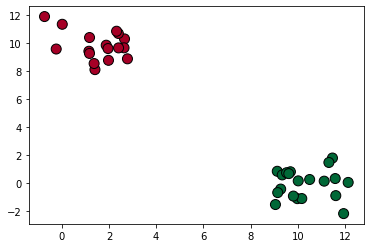

In [17]:
# losowe 50 punktów ze środkami w [2, 10] i [10, 0]
numPoints = 50
XY, labels = make_blobs(n_samples=numPoints, n_features=2, centers = [[2, 10], [10, 0]])
train_data, test_data, train_labels, test_labels = train_test_split(XY, 
                                        labels, train_size=0.75, random_state=0)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels,s =100, cmap='RdYlGn', edgecolors='k')

Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: linear na danych testowych: 100.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: poly na danych testowych: 100.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: sigmoid na danych testowych: 100.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: rbf na danych testowych: 100.000%


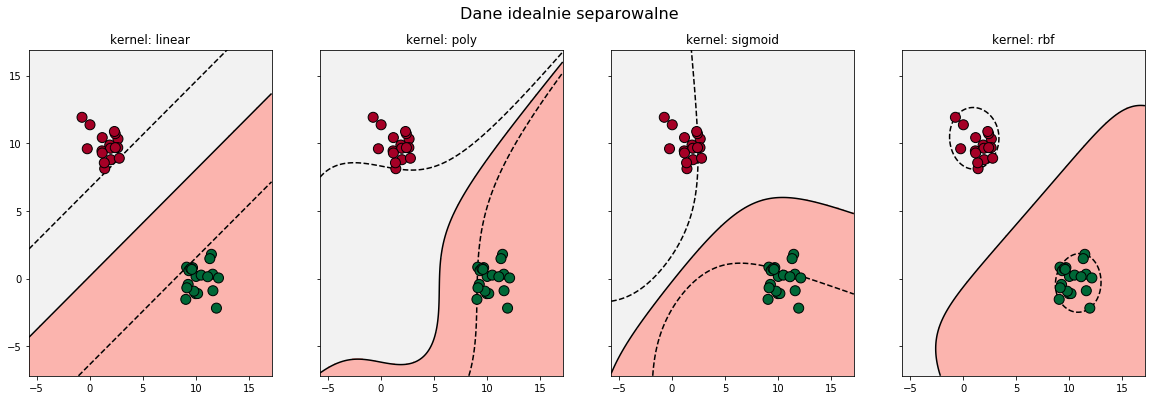

In [18]:
plot_classifications(train_data, train_labels,test_data, test_labels, 1, 'Dane idealnie separowalne')

Można zauważyć, że klasyfikator SVM sprawdza się bardzo dobrze (wystarczy klasyfikator liniowy, inne kernele dla podglądu). Dodatkowo, należy wziąć pod uwagę, że wykresy klasyfikujące z wyjątkiem kernela liniowego są tylko projekcją hiperpłaszczyzny większego wymiaru. (dlatego nie są to linie proste, pozwala to na wizualizacje granic na oryginalnych danych) 


## Słabiej separowalne dane (mogą występować złe klasyfikacje)



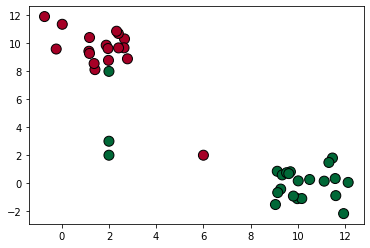

In [19]:
a = np.array([(2,2),(2,8),(2,3),(6,2)])
XY_new = np.vstack((train_data, a))
labels_new = np.append(train_labels,[1,1,1,0])
plt.scatter(XY_new[:, 0], XY_new[:, 1], c=labels_new,s =100, cmap='RdYlGn', edgecolors='k')

**Zastosowanie parametru C - kompromis między dokładnością klasyfikacji podczas uczenia, a szerokością marginesu - im wyższy tym większa dokładność = węższy margines**

Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: linear na danych testowych: 100.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: poly na danych testowych: 100.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: sigmoid na danych testowych: 100.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: rbf na danych testowych: 100.000%


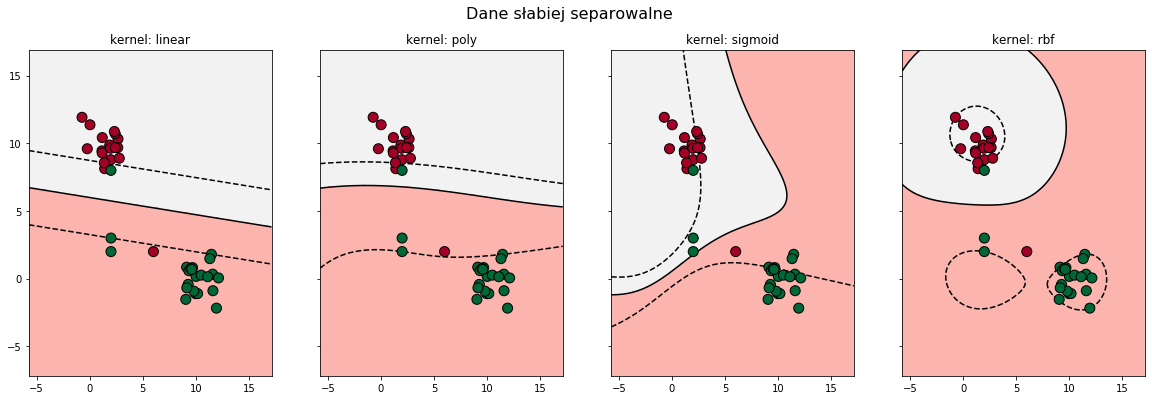

In [20]:
plot_classifications(XY_new, labels_new,test_data,test_labels, 1, 'Dane słabiej separowalne')

### Modyfikowanie parametru C

Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: linear na danych testowych: 100.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: poly na danych testowych: 92.308%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: sigmoid na danych testowych: 92.308%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: rbf na danych testowych: 84.615%


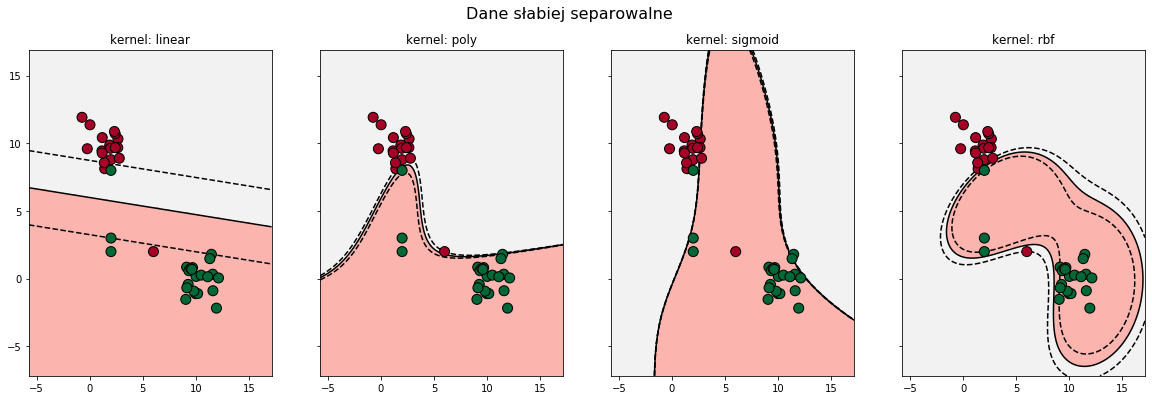

In [21]:
plot_classifications(XY_new, labels_new,test_data, test_labels, 1000, 'Dane słabiej separowalne')

Parametr C jest bardzo wysoki (1000) co oznacza, że zależy nam na dokładności klasyfikacji podczas uczenia. Takie podejście powoduje małe marginesy co może powodować "overfitting" (model jest idealny dla danych treningowych, jednak niekoniecznie sprawdza się jako rozwiązanie ogólne)

Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: linear na danych testowych: 100.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: poly na danych testowych: 100.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: sigmoid na danych testowych: 38.462%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: rbf na danych testowych: 38.462%


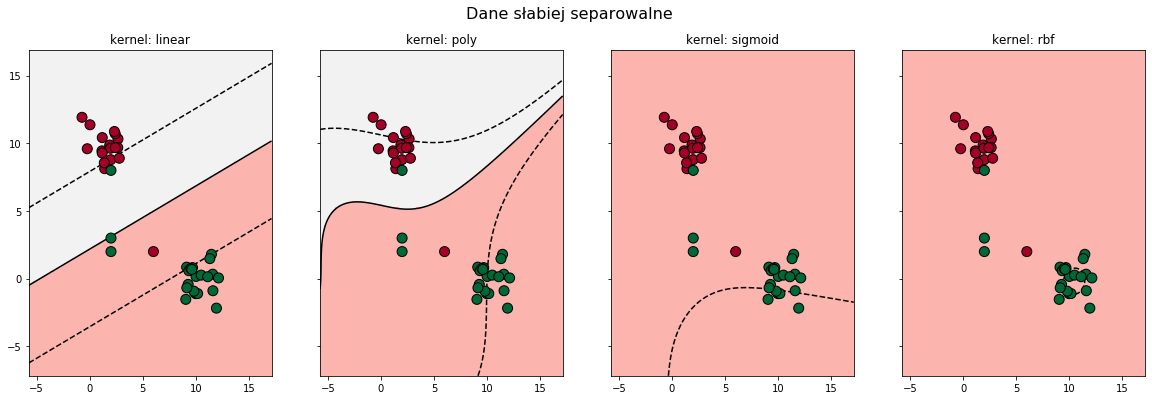

In [22]:
plot_classifications(XY_new, labels_new, test_data, test_labels, 0.01, 'Dane słabiej separowalne')

W tym przypadku parametr C jest bardzo mały, co powoduje słabą dokładność klasyfikacji. Mozna zauważyć, ze dla kerneli "sigmoid"i "rbf" SVM sklasyfikował wszystkie dane do jednej kategorii 

## Dane nieseparowalne

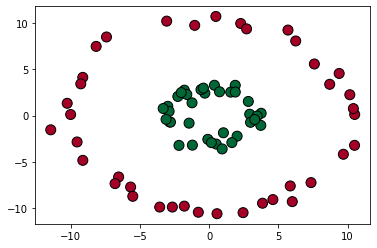

In [23]:
numPoints = 100
not_separable_data, not_separable_labels = make_circles(n_samples=numPoints,
  factor=.3, noise=.06)
not_separable_data = 10 * not_separable_data
not_separable_train_data, not_separable_test_data, not_separable_train_labels, not_separable_test_labels = train_test_split(not_separable_data, 
                                        not_separable_labels, train_size=0.75, random_state=0)
plt.scatter(not_separable_train_data[:, 0], not_separable_train_data[:, 1], c=not_separable_train_labels, s=100, zorder=10, cmap='RdYlGn',
                edgecolors='k')


### Przykład rozwiązania bez użycia triku kernelowego 

Znajdujemy funkcję mapującą do większego wymiaru, a następnie tworzymy hiperpłaszczyznę dzielącą dane na dwie klasy  

In [24]:
def f(x,y):
  return x**2 + y**2

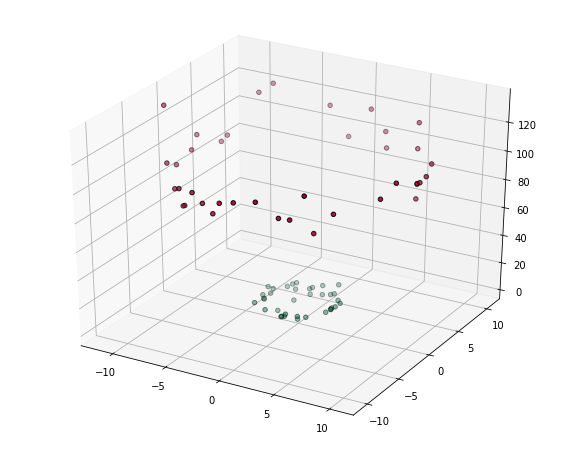

In [25]:
z = f(not_separable_train_data[:, 0], not_separable_train_data[:, 1])
z_test = f(not_separable_test_data[:, 0], not_separable_test_data[:, 1])

fig = plt.figure(figsize=(10, 8)) 
ax = plt.axes(projection='3d')
ax.scatter(not_separable_train_data[:, 0], not_separable_train_data[:, 1], z, c=not_separable_train_labels, zorder=10, cmap='RdYlGn', edgecolors='k')



In [26]:
mapped_data = np.c_[not_separable_train_data, z]
mapped_test_data = np.c_[not_separable_test_data, z_test]
classifier = svm.SVC(kernel="linear")
classifier.fit(mapped_data, not_separable_train_labels)

predicted = classifier.predict(mapped_test_data)

accuracy = accuracy_score(not_separable_test_labels, predicted)
print("Dokladnosc po zastosowaniu klasyfikatora SVM na danych testowych: %.3f%%" % (float(accuracy)*100.0))

Dokladnosc po zastosowaniu klasyfikatora SVM na danych testowych: 100.000%


### Z użyciem kernel trick

Unikamy szukania funkcji mapującej i obliczeń przetwarzających dane do wyższych wymiarów

Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: linear na danych testowych: 60.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: poly na danych testowych: 60.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: sigmoid na danych testowych: 68.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: rbf na danych testowych: 100.000%


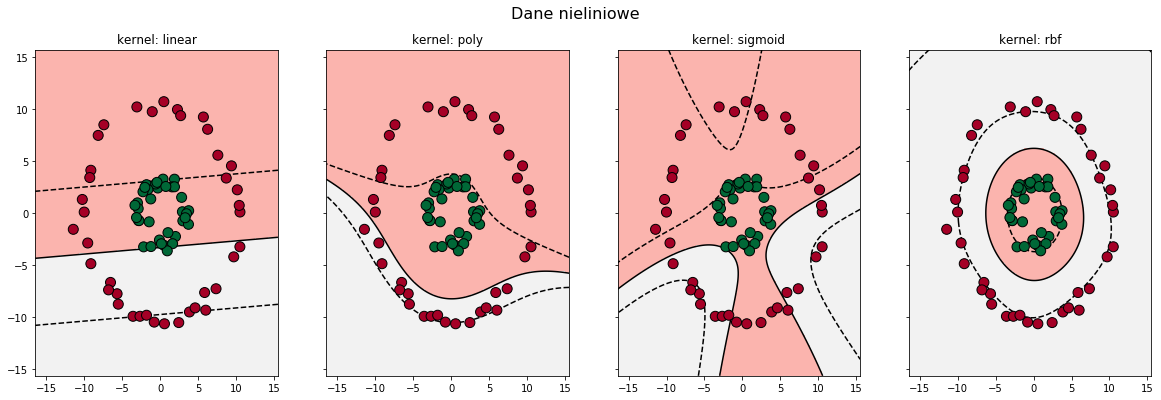

In [27]:
plot_classifications(not_separable_train_data, not_separable_train_labels, not_separable_test_data, not_separable_test_labels, 1, 'Dane nieliniowe')

Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: linear na danych testowych: 60.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: poly na danych testowych: 60.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: sigmoid na danych testowych: 64.000%
Dokladnosc po zastosowaniu klasyfikatora SVM o kernelu: rbf na danych testowych: 100.000%


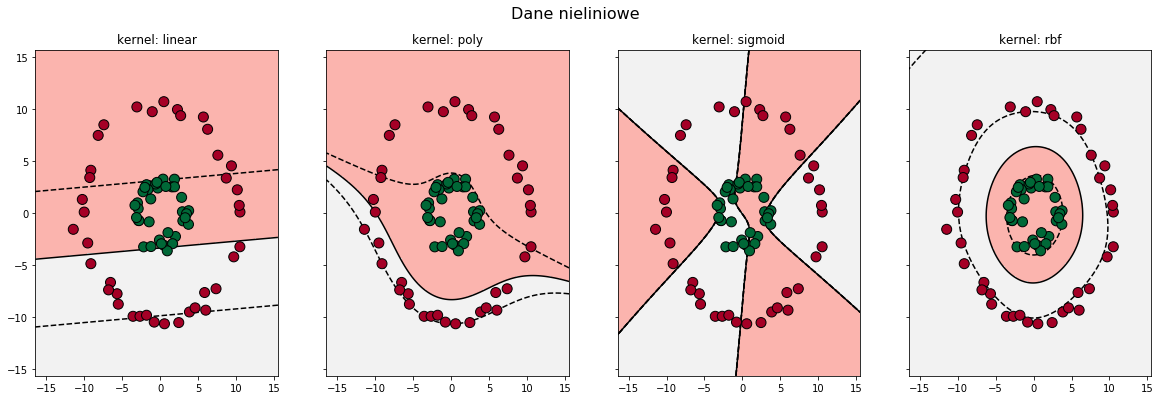

In [28]:
plot_classifications(not_separable_train_data, not_separable_train_labels, not_separable_test_data, not_separable_test_labels, 1000, 'Dane nieliniowe')

Można zauważyć, że kernel "rbf" sprawdza się idealnie do danych tego typu (pierścienie)

## Metody oceny modelu

--------------------------------------------------------------------------------

In [29]:
#Funkcje pomocnicze
def calculate_f1_score(train_data, train_labels, test_data, test_labels, c, kernel):
    classifier = svm.SVC(kernel = kernel, C =c)

    classifier.fit(train_data, train_labels)
    predicted_labels = classifier.predict(test_data)
    return f1_score(test_labels, predicted_labels)

def plot_roc(train_data, train_labels, test_data, test_labels, c, kernel):
    classifier = svm.SVC(kernel = kernel, C =c)

    classifier.fit(train_data, train_labels)
    plot_roc_curve(classifier, test_data, test_labels)

    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

def plot_PR(train_data, train_labels, test_data, test_labels, c, kernel):
    classifier = svm.SVC(kernel = kernel, C =c)

    classifier.fit(train_data, train_labels)

    plot_precision_recall_curve(classifier, test_data, test_labels)

    plt.title('Precision-Recall')
    plt.legend(loc="lower right")
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
  
def plot_classification(train_data, train_labels, test_data, test_labels, c, data_type, kernel):
    XX, YY, decision_function, accuracy = classification(train_data, train_labels, test_data, test_labels, kernel, c)

    f, axis = plt.subplots(1, 2, figsize=(20, 6),sharey=True)
    f.suptitle(data_type + '\nkernel: ' + kernel, fontsize=16)

    axis[0].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=80,cmap='RdYlGn', zorder=10, edgecolors='k')
    axis[0].pcolormesh(XX, YY, decision_function < 0, cmap=plt.cm.Pastel1)
    axis[0].contour(XX, YY, decision_function, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
    axis[0].set_title('dane treningowe')

    axis[1].scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=80,cmap='RdYlGn', zorder=10, edgecolors='k')
    axis[1].pcolormesh(XX, YY, decision_function < 0, cmap=plt.cm.Pastel1)
    axis[1].contour(XX, YY, decision_function, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
    axis[1].set_title('dane testowe')

    print("Dokladnosc po zastosowaniu klasyfikatora SVM na danych testowych: %.3f%%" % (float(accuracy)*100.0))

def plot_contingency_table(train_data, train_labels, test_data, test_labels, c, kernel):
    classifier = svm.SVC(kernel = kernel, C =c)

    classifier.fit(train_data, train_labels)

    plot_confusion_matrix(classifier, test_data, test_labels, display_labels=['red', 'green'], cmap=plt.cm.Blues)

### Cross validation

Metoda statystyczna, w której zbiór danych dzielimy na zbiór treningowy i testowy (prosta walidacja), następnie trenujemy model za pomocą zbioru treningowego, a testujemy za pomocą zbioru testowego. 

Istnieje takze K-krotna walidacja, gdzie zbiór danych dzielimy na K możliwie równych podzbiorów, następnie każdy z nich dokładnie raz używamy jako zbiór testowy, a pozostałe K-1 jako zbiór treningowy, wykonując w ten sposób K symulacji.

### Receiver Operating Characteristic



Zobaczmy skąd bierze się krzywa ROC:
- bierzemy zbiór danych, wykonujemy na nim liniową klasyfikację SVC:

Text(0.5, 1.0, 'dane testowe')

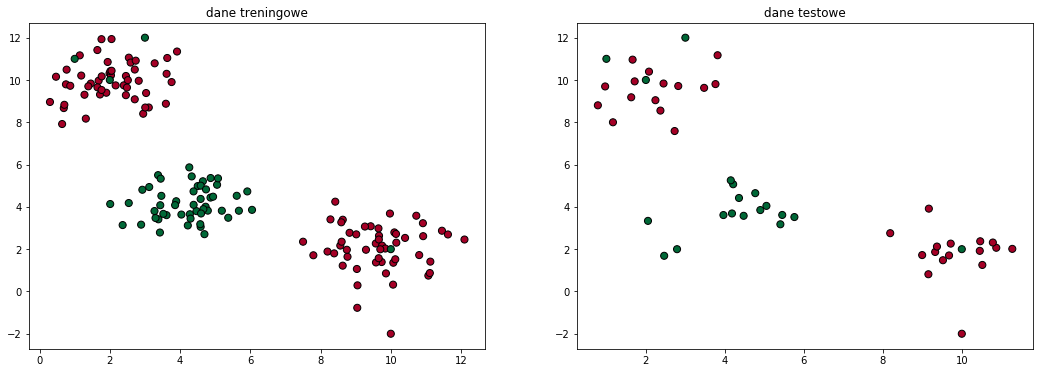

In [30]:
# testowe dane - grupy punktów, zgromadzine wokół (2, 10) oraz (10, 0)
train_data, train_labels = make_blobs(n_samples=150, n_features=2, centers = [[2, 10], [4, 4], [10, 2]])
train_labels = [1 if x==1 else 0 for x in train_labels]

# dodajemy lekkie zaburzenia
train_data = np.vstack((train_data, np.array([(2,10),(1,11),(3,12),(10, -2), (10, 2)])))
train_labels = np.append(train_labels,[1,1,1,0,1])

# dane testowe, podobnie wygenerowane do poprzednich
test_data, test_labels = make_blobs(n_samples=45, n_features=2, centers = [[2, 10], [4, 4], [10, 2]])
test_labels = [1 if x==1 else 0 for x in test_labels]
test_data = np.vstack((test_data, np.array([(2,10),(1,11),(3,12),(10, -2), (10, 2)])))
test_labels = np.append(test_labels,[1,1,1,0,1])

f, axis = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axis[0].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s = 50,  cmap='RdYlGn', zorder=10, edgecolors='k')
axis[0].set_title("dane treningowe")
axis[1].scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s = 50,cmap='RdYlGn', zorder=10, edgecolors='k')
axis[1].set_title("dane testowe")

Dokladnosc po zastosowaniu klasyfikatora SVM na danych testowych: 86.000%


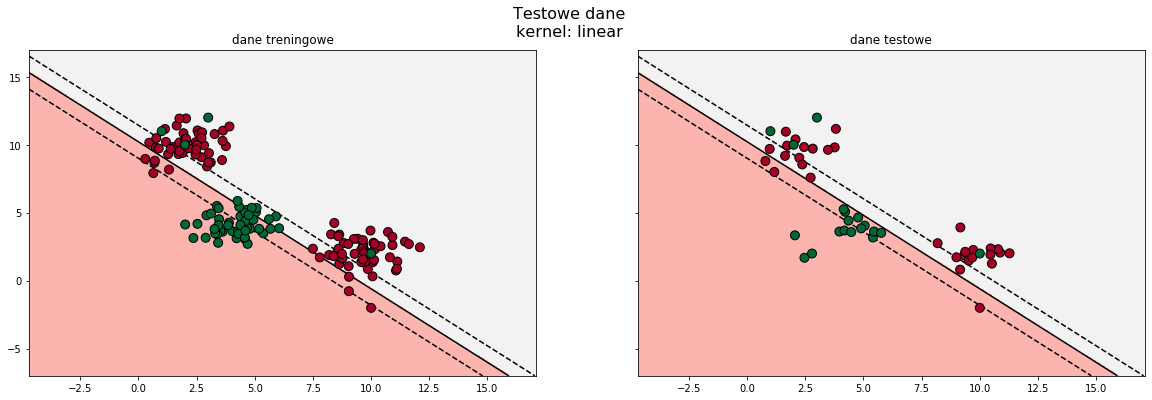

In [31]:
plot_classification(train_data, train_labels, test_data, test_labels, 1, 'Testowe dane', 'linear')

- rysujemy macierz błędu (*confusion matrix / contingency table*), składa się ona z czterych pól:
  - *TP*:   true positives, punky były oznaczone jako czerwone (True labels) i tak też zostały zaklasyfikowane (Predicted labels),
  - *FP*:   false positives, punkty zielone, zaklasyfikowane jako czerwone,
  - *FN*:   false negatives, punkty czerwone, zaklasyfikowane jako zielone,
  - *TN*:   true negatives, punkty zielone, zaklasyfikowane jako zielone,

![confusion matrix ](https://drive.google.com/uc?id=1b04cjONAeZ479CBQjMcxuOcoJOhLRLHr)

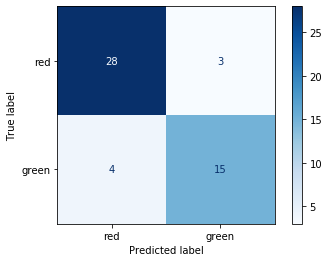

In [32]:
plot_contingency_table(train_data, train_labels, test_data, test_labels, 1, 'linear')

Na tej podstawie możemy obliczyć wartości:

<p>&nbsp;</p>

$$True \hspace{0.2cm} Positive \hspace{0.2cm} Rate = Sensitivity = \frac{True Positives}{True Positives + False Negatives}$$

<p>&nbsp;</p>

$$False \hspace{0.2cm} Positive \hspace{0.2cm} Rate = 1 - Specificity = \frac{False Positives}{False Positives + True Negatives}$$

W funkcji *classification* używamy funkcji *decision_function*, która dla każdego z zadanych punktów zwraca jakąś wartość. Przyjmujemy, że wartości powyżej pewnego progu oznaczają, że dany punkt należy do jednej klasy, a poniżej, do drugiej (domyślnie ten próg wynosi 0). 

Próg ten możemy zmieniać, co będzie skutkowało  większą tendencją modelu do oznaczania punktów jako należące do jednej lub drugiej klasy (w naszym przypadku jako zielone lub czerwone). Wraz ze zmianą tendencji modelu zmieniają się także wartości w macierzy błędu.

Krzywa **ROC** powstaje poprzez wyciczenie wartości *True Positive Rate* (oś pionowa krzywej ROC) oraz False Positive Rate (oś pozioma krzywej ROC) dla danego progu.

Najlepiej, aby True Positive Rate = 1 i False Positive Rate = 0, a więc aby krzywa była jak najbliżej lewego górnego rogu osi.

Możemy wybrać próg, który najbardzej odpowiada naszym potrzebom - ma wysokie True Positive Rate, niskie False Positive Rate, lub model optymalny, czyli dajęcy wynik najbliższy punktowi (0,1) na osi.

- rysukemy krzywą ROC dla naszego przypadku i dla kernela liniowego 

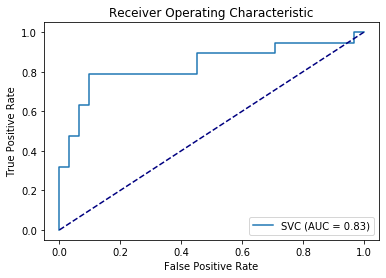

In [33]:
plot_roc(train_data, train_labels, test_data, test_labels, 1, 'linear')

### Precision-Recall

Zasada co do tworzenia krzywej pozostaje identyczna jak w przypadku krzywej ROC, zmieniają się jedynie osie, mamy tutaj:


<p>&nbsp;</p>

$$Precision = \frac{True Positives}{True Positives + False Positives}$$

<p>&nbsp;</p>

$$Recall = \frac{True Positives}{True Positives + False Negatives}$$

<p>&nbsp;</p>

W naszym przykładzie krzywa będzie miała nastepująco postać:

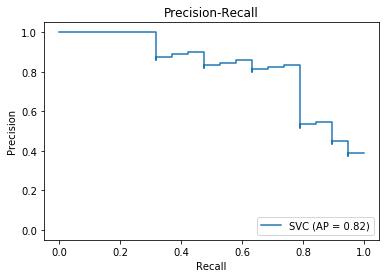

In [34]:
plot_PR(train_data, train_labels, test_data, test_labels, 1, 'linear')

Na tej krzywej idealnym punktem jest punkt (1, 1), ponieważ oznacza on, że *False Positives* = *False Negatives* = 0. 

Najlepiej jest więc wybierać próg, który sprawi, że zarówno *precision* jak i *recall* będą możliwie blisko 1, z przewagą jednego lub drugiego, w zależności od tego czy wolimy mieć z większym prawdopodobieństwem wyniki fałszywe były klasyfikowane jako wyniki z pierwszej czy drugiej klasy.

### Porównanie ROC oraz Precision-Recall

Obie te krzywe mogą pomóc nam ocenić jaki próg będzie dla nas odpowiedni, jednak co do zasady:

- krzywa ROC jest dosyć prosta i może być użyta, gdy mamy w miarę równo rozłożone dane należące do obu klas,
- gdy w dużej mierze przeważają danne z jednej klasy, powinniśmy użyć krzywej PR,

Jest to spowodowane faktem, że krzywa ROC, przy nierównych danych, może dawać nam optymistyczny obraz wydajności modelu, (przykład [tutaj](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)), podczas gdy krzywa PR lepiej odzwierciedla faktyczne zachowanie modelu.


Przykład pokazujący rysowanie krzywych przy zmianie progu:

![alt text](https://miro.medium.com/max/1400/1*Dmsoecp2PPYRIXJk_ESBdw.gif)

### Area Under the Curve

Pole powierzchni pod wykresem może być przydatne przy porównywaniu różnych modeli zastosowanych dla danego problemu. Generalnie, im większe AUC, tym lepszy model.

Dla przykładu porównajmy dwa kernele zastosowane dla naszych danych:

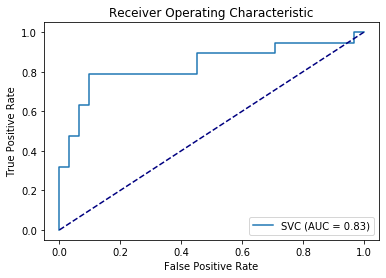

In [35]:
plot_roc(train_data, train_labels, test_data, test_labels, 1, 'linear')

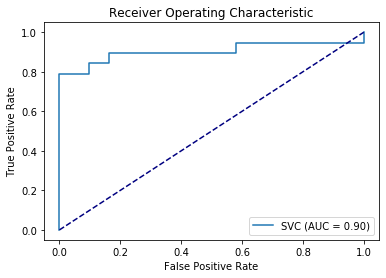

In [36]:
plot_roc(train_data, train_labels, test_data, test_labels, 1, 'rbf')

Jak możemu zobaczyć w legendzie, AUC dla obu kerneli jest różna, tak samo jak i sam wykres. Lepiej powinien się sprawdzić kernel *rbf*, ponieważ przy tym ustawieniu danych nie jest możliwe narysowanie prostej dobrze je oddzielajacej, a jednocześnie można narysować linię podziału wokół zielonych punktów, co zmniejszy ilość fałszywie zaklasyfikowanych danych. 

### Accurancy

Dokładność jest metryką do oceny jakości klasyfikacji. Wylicza się ją ze wzoru :

<p>&nbsp;</p>

$$Accurancy = \frac{True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative}$$

<p>&nbsp;</p>

Jest ona miarą przypadków poprawnie zaklasyfikowanych do wszystkich przypadków. 


In [37]:
_, _, _, accuracy = classification(train_data, train_labels, test_data, test_labels, 'linear', 1)
print(accuracy)

0.86


### F1

Miara F1 wyliczana jest, jako średnia harmoniczna Precision i Recall:

<p>&nbsp;</p>

$$F1 = 2 * \frac{Precision * Recall}{Precision + Recall}$$

<p>&nbsp;</p>

Obie miary biorą wszystkie cztery pola macierzy błędu pod uwagę i pozwalają określić jakość modelu. Różnica pomiędzy nimi polega na tym, że miara F1 jest bardziej wrażliwa na różnicę pomiędzy *False Positive* i *False Negative*.

In [38]:
calculate_f1_score(train_data, train_labels, test_data, test_labels, 1, 'linear')

0.8108108108108109

# Zadanie 2 

Zademonstrować działanie klasyfikatora SVM dla różnych kerneli. Dokonać walidacji krzyżowej. Porównać krzywe ROC i PR a także miary F-1 oraz powierzchni pod nimi. 

In [39]:
cancer = load_breast_cancer()


In [40]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [41]:
print("Nazwy cech:",df_cancer.columns)
print("(Liczba próbek, Liczba cech):",df_cancer.shape)

Nazwy cech: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
(Liczba próbek, Liczba cech): (569, 31)


In [42]:
# PRZYGOTOWANIE DANYCH
X = df_cancer.drop(['target'], axis = 1)
y = df_cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#normalizacja
X_train_min = X_test.min()
X_train_range = (X_train - X_train_min).max()
X_train_scaled = (X_train - X_train_min)/X_train_range

X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [43]:
def classification(train_data, train_labels, test_data, test_labels, c, kernel):
    classifier = OneVsRestClassifier(svm.SVC(kernel = kernel, C =c))
  
    classifier.fit(train_data,train_labels)
    predicted_labels = classifier.predict(test_data)
    accuracy = accuracy_score(test_labels, predicted_labels)
    
    return (classifier, predicted_labels, accuracy, kernel)

In [44]:
kernels = ['linear','poly','sigmoid' , 'rbf'] 
classification_results = []
for kernel in kernels:
   classification_results.append(classification(X_train_scaled, y_train, X_test_scaled, y_test, 1, kernel))



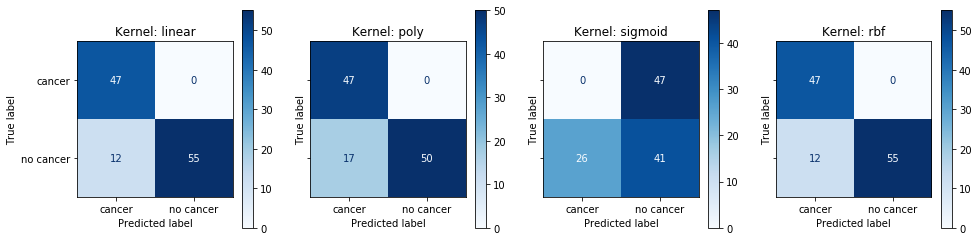

In [45]:
#plotting confusion matrix
display_labels = ['cancer', 'no cancer']
f, axis = plt.subplots(1, len(classification_results), figsize=(16, 4),sharey=True)
for i, result in enumerate(classification_results):
  axis[i].set_title("Kernel: {}".format(result[3]))
  plot_confusion_matrix(result[0], X_test_scaled, y_test, display_labels=display_labels, cmap=plt.cm.Blues, ax = axis[i] )

In [46]:
def plot_classification_quality(classification_result, test_data, test_labels):
  f, axis = plt.subplots(1, 2, figsize=(10, 4),sharey=True)
  f.tight_layout(pad=4.0)
  plot_roc_curve(classification_result[0], test_data, test_labels, ax = axis[0])

  axis[0].set_xlim([-0.05, 1.05])
  axis[0].set_ylim([-0.05, 1.05])
  axis[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
  axis[1].set_title(" krzywa: {}".format( "Precision-Recall"))
  

  plot_precision_recall_curve(classification_result[0], test_data, test_labels, ax = axis[1])


  axis[1].set_xlim([-0.05, 1.05])
  axis[1].set_ylim([-0.05, 1.05])
      
  
  print("Dokladnosc po zastosowaniu klasyfikatora: %.3f%%" % (float(classification_result[2])*100.0))
  print("F1  wynik: {}".format(f1_score(test_labels, classification_result[1])))
  plt.show()

## Ocena jakości

Dla danych w których dominuje jedna klasa i zależy nam na wykryciu elementów tej mniejszej klasy lepiej użyć innych klasyfikatorów jakości niż procent dokładności. Weźmy za przykład model wykrywający raka (tak jak w naszym przykładzie), który myli się rzadko. Pomimo wysokiego procentu dokładności nasz model myli się w tak ważnej kwestii, od której zależy czyjeś życie. <br>
Klasyfikatorami które pozwolą lepiej sprawdzić jakość modelu mogą być:
- krzywa ROC
- krzywa Precision-Recall
- wskaźnik F1

Kernel:  linear
Dokladnosc po zastosowaniu klasyfikatora: 89.474%
F1  wynik: 0.9016393442622952


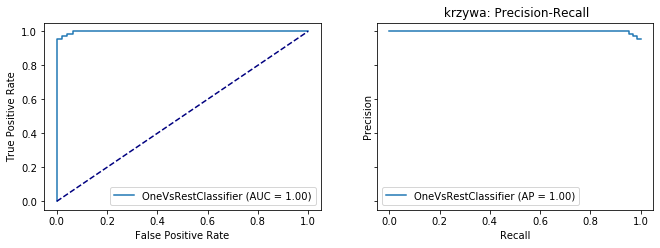

Kernel:  poly
Dokladnosc po zastosowaniu klasyfikatora: 85.088%
F1  wynik: 0.8547008547008548


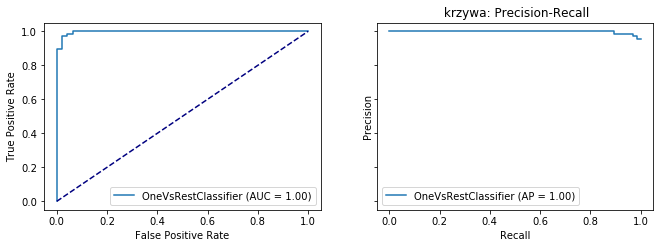

Kernel:  sigmoid
Dokladnosc po zastosowaniu klasyfikatora: 35.965%
F1  wynik: 0.5290322580645161


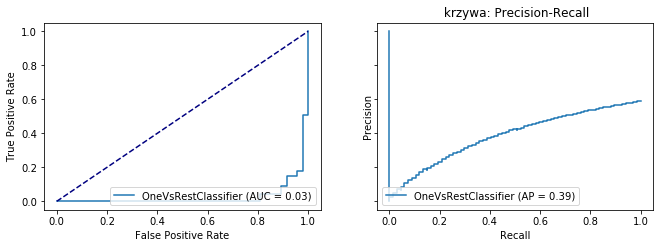

Kernel:  rbf
Dokladnosc po zastosowaniu klasyfikatora: 89.474%
F1  wynik: 0.9016393442622952


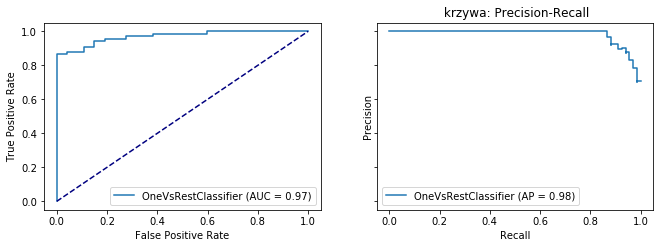

In [47]:

for i, result in enumerate(classification_results):
  print("Kernel: ", result[3])
  plot_classification_quality(result, X_test_scaled, y_test)

# Zadanie 3

Wyniki klasyfikacji dla zbioru z zadania 2 po użyciu metody PCA

In [48]:
def plot_results_with_pca(test_data, test_labels, predicted_labels): 
  
  #PRZYGOTOWANIE DANYCH
  scaler = StandardScaler()
  scaled_test_data = scaler.fit_transform(test_data)
  pca = PCA(n_components=2)
  pca_data = pca.fit_transform(scaled_test_data) 

  f, axis = plt.subplots(1, 2, figsize=(10, 4),sharey=True)
  f.tight_layout(pad=4.0)
  #mapowanie dla zadania 4 gdzie labelki sa stringami  
  mapped_prediction = map(lambda x: int(x),predicted_labels)
  mapped_original = map(lambda x: int(x),test_labels)

  axis[0].scatter(pca_data[:, 0], pca_data[:, 1], c=list(mapped_original), s=100,cmap='RdYlGn', zorder=10, edgecolors='k')
  axis[0].set_title("Prawdziwe klasyfikacje")
  axis[1].scatter(pca_data[:, 0], pca_data[:, 1], c=list(mapped_prediction), s=100,cmap='RdYlGn', zorder=10, edgecolors='k')
  axis[1].set_title("Przewidywane klasyfikacje")
  plt.show()

Kernel:  linear


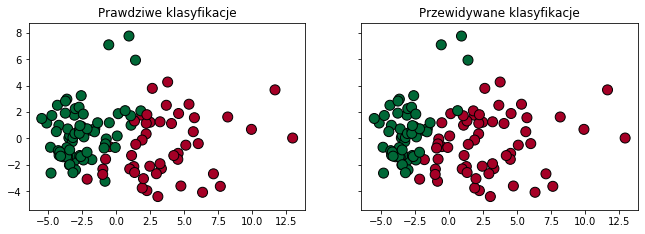

Kernel:  poly


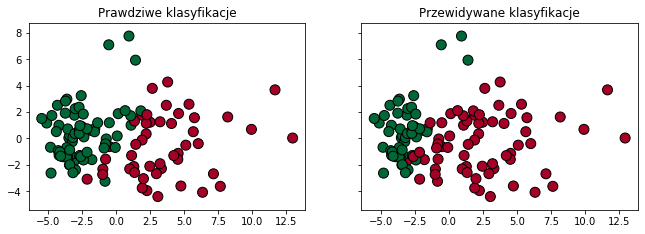

Kernel:  sigmoid


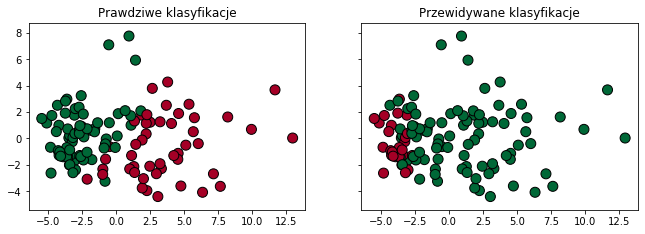

Kernel:  rbf


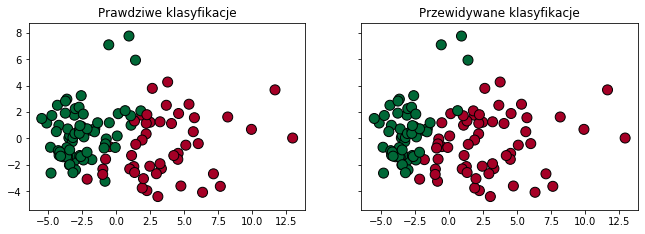

In [49]:

for i, result in enumerate(classification_results):
  print("Kernel: ", result[3])
  plot_results_with_pca(X_test,y_test, result[1])

# Zadanie 4

ZADANIE dla studentów: Na wybranych przez prowadzących tutorial
zbiorach danych dokonać klasyfikacji metodą SVM dla różnych kerneli, oraz
klasyfikacji metodą k-NN dla k=1,3 i 5. Podglądnąć otrzymane wyniki przy
pomocy PCA.
Skomentować otrzymane wyniki.
Zrobić to samo, ale redukując wcześniej wymiarowość danych metodą PCA.
Np. w przypadku zbioru MNIST z 784 do 30. Czy wyniki uległy poprawie?
Jeżeli tak (nie) to dlaczego? Skomentować otrzymane wyniki.

In [50]:
mnist = fetch_openml("mnist_784", data_home="./mnist_784", cache=True)

In [51]:
n_samples = 1500

mnist_data = mnist.data[:n_samples]
mnist_labels = mnist.target[:n_samples]

random_state = np.random.RandomState(0)

n_samples, n_features = mnist_data.shape

task_train_data, task_test_data, task_train_labels, task_test_labels = train_test_split(mnist_data, mnist_labels,
                                                    test_size=.3,
                                                    random_state=random_state)



Najpierw przeprowadzamy klasyfikację
- wybraliśmy C=1

In [52]:
kernels = ['linear','poly','sigmoid' , 'rbf'] 
task_classification_results = []
for kernel in kernels:
   task_classification_results.append(classification(task_train_data, task_train_labels, task_test_data, task_test_labels, 1, kernel))

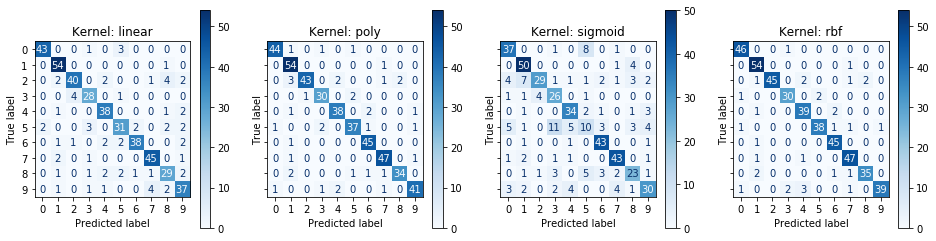

In [53]:
#plotting confusion matrix for svm
task_display_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
f, axis = plt.subplots(1, len(task_classification_results), figsize=(16, 4),sharey=True)
for i, result in enumerate(task_classification_results):
  axis[i].set_title("Kernel: {}".format(result[3]))
  plot_confusion_matrix(result[0], task_test_data, task_test_labels, display_labels=task_display_labels, cmap=plt.cm.Blues, ax = axis[i] )

In [54]:
predictions = []
for k in range(5):
  clf = KNeighborsClassifier(k+1)
  clf.fit(task_train_data, task_train_labels)

  y_predicted = clf.predict(task_test_data)
  accuracy = accuracy_score(task_test_labels, y_predicted)
  result = (clf, y_predicted, accuracy)
  predictions.append(result)

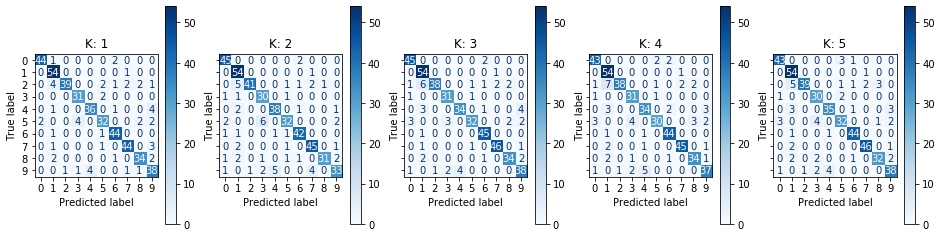

In [55]:
#plotting confusion matrix for k-classificator
task_display_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
f, axis = plt.subplots(1, len(predictions), figsize=(16, 4),sharey=True)
for i, result in enumerate(predictions):
  axis[i].set_title("K: {}".format(i+1))
  plot_confusion_matrix(result[0], task_test_data, task_test_labels, display_labels=task_display_labels, cmap=plt.cm.Blues, ax = axis[i] )

# Porównanie

In [56]:
n_classes = 10
print("====SVM=====")
for i, result in enumerate(task_classification_results):
  print("Kernel: ", result[3])
  print("Dokladnosc po zastosowaniu klasyfikatora: %.3f%%" % (float(result[2])*100.0))

  
  
print("====KNN=====")
#klasyfikator k-nn
for k,prediction in enumerate(predictions):
  
  print("k={}".format(k+1))
  print("Dokladnosc po zastosowaniu klasyfikatora: %.3f%%" % (float(prediction[2])*100.0))



      

====SVM=====
Kernel:  linear
Dokladnosc po zastosowaniu klasyfikatora: 85.111%
Kernel:  poly
Dokladnosc po zastosowaniu klasyfikatora: 91.778%
Kernel:  sigmoid
Dokladnosc po zastosowaniu klasyfikatora: 72.222%
Kernel:  rbf
Dokladnosc po zastosowaniu klasyfikatora: 92.889%
====KNN=====
k=1
Dokladnosc po zastosowaniu klasyfikatora: 88.000%
k=2
Dokladnosc po zastosowaniu klasyfikatora: 86.889%
k=3
Dokladnosc po zastosowaniu klasyfikatora: 88.222%
k=4
Dokladnosc po zastosowaniu klasyfikatora: 86.667%
k=5
Dokladnosc po zastosowaniu klasyfikatora: 87.333%


# Wizualizacja z PCA

Kernel:  linear


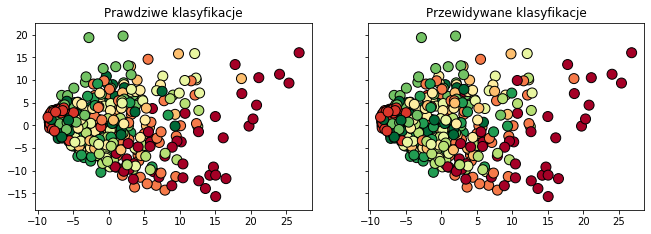

Kernel:  poly


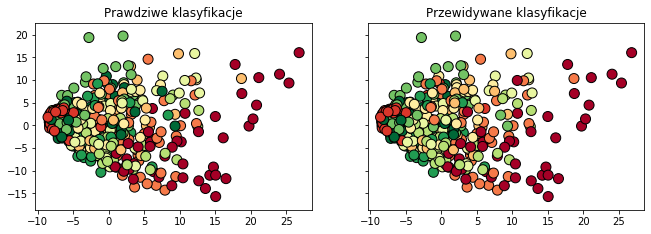

Kernel:  sigmoid


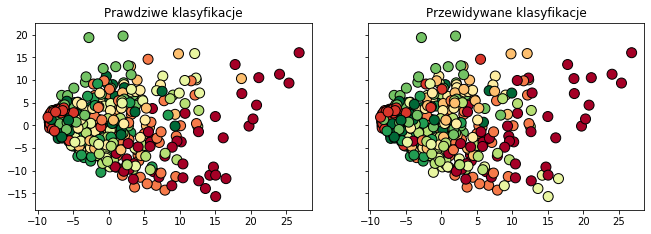

Kernel:  rbf


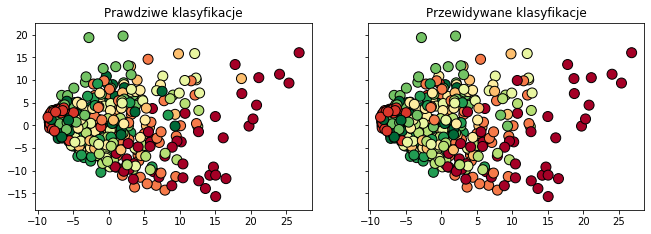

K: 1


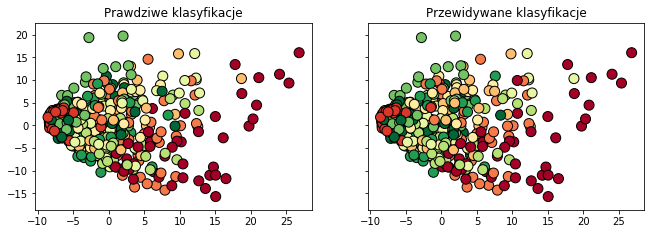

K: 2


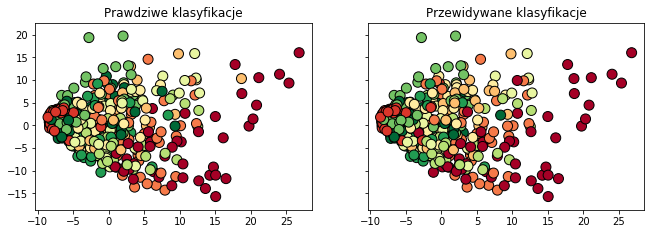

K: 3


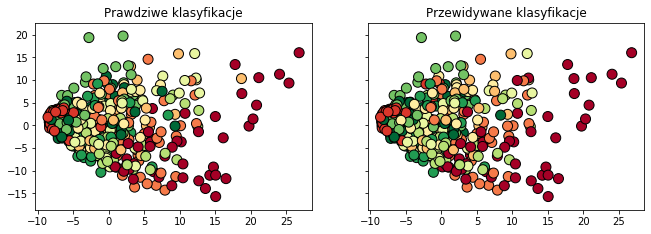

K: 4


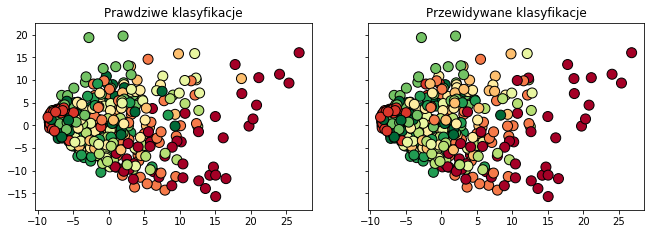

K: 5


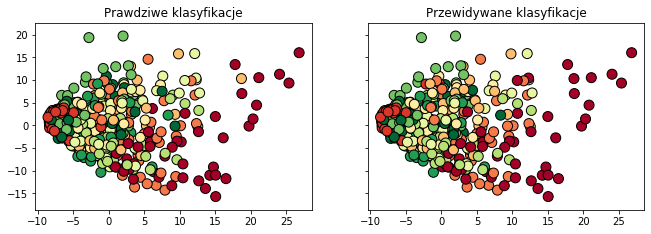

In [57]:
for i, result in enumerate(task_classification_results):
  print("Kernel: ", result[3])
  plot_results_with_pca(task_test_data, task_test_labels, result[1])

print("===================================================")

for i, prediction in enumerate(predictions):
  print("K: {}".format(i+1))
  plot_results_with_pca(task_test_data,task_test_labels, prediction[1])

# Redukcja wymiarowości
Redukcja do 10 wymiarów

In [58]:
#PRZYGOTOWANIE DANYCH
scaler = StandardScaler()
pca = PCA(n_components=10)

#skalowanie danych
scaler.fit(task_train_data)

task_train_scaled = scaler.transform(task_train_data)
task_test_scaled = scaler.transform(task_test_data)

#transformacja używając PCA
pca.fit(task_train_scaled)

task_train_pca = pca.transform(task_train_scaled)
task_test_pca = pca.transform(task_test_scaled)

In [59]:
kernels = ['linear','poly','sigmoid' , 'rbf'] 
pca_classification_results = []
for kernel in kernels:
   pca_classification_results.append(classification(task_train_pca, task_train_labels, task_test_pca, task_test_labels, 1, kernel))

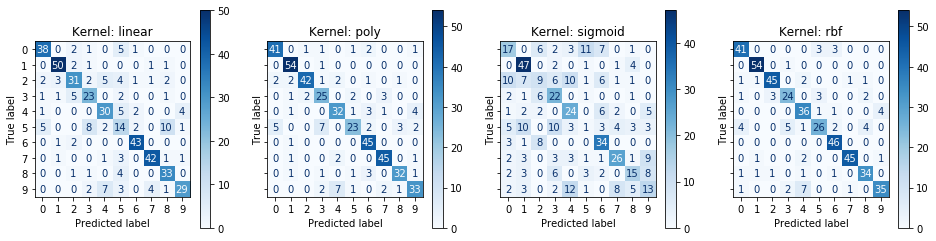

In [60]:
#plotting confusion matrix
task_display_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
f, axis = plt.subplots(1, len(pca_classification_results), figsize=(16, 4),sharey=True)
for i, result in enumerate(pca_classification_results):
  axis[i].set_title("Kernel: {}".format(result[3]))
  plot_confusion_matrix(result[0], task_test_pca, task_test_labels, display_labels=task_display_labels, cmap=plt.cm.Blues, ax = axis[i] )

In [61]:
predictions_pca = []
for k in range(5):
  clf = KNeighborsClassifier(k+1)
  clf.fit(task_train_pca, task_train_labels)

  y_predicted = clf.predict(task_test_pca)
  accuracy = accuracy_score(task_test_labels, y_predicted)
  result = (clf, y_predicted, accuracy)
  predictions_pca.append(result)

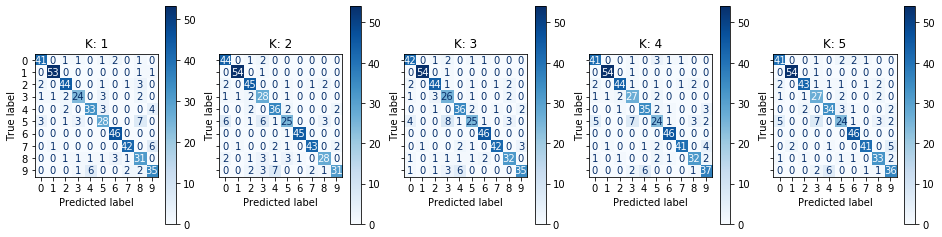

In [62]:
#plotting confusion matrix for k-classificator
task_display_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
f, axis = plt.subplots(1, len(predictions_pca), figsize=(16, 4),sharey=True)
for i, result in enumerate(predictions_pca):
  axis[i].set_title("K: {}".format(i+1))
  plot_confusion_matrix(result[0], task_test_pca, task_test_labels, display_labels=task_display_labels, cmap=plt.cm.Blues, ax = axis[i] )

# Ocena jakości

In [63]:
print("====SVM=====")
for i, result in enumerate(pca_classification_results):
  print("Kernel: ", result[3])
  print("Dokladnosc po zastosowaniu klasyfikatora: %.3f%%" % (float(result[2])*100.0))
  
print("====KNN=====")
#klasyfikator k-nn
for k in range(5):
  print("k={}".format(k+1))
  print("Dokladnosc po zastosowaniu klasyfikatora: %.3f%%" % (float(accuracy)*100.0))

====SVM=====
Kernel:  linear
Dokladnosc po zastosowaniu klasyfikatora: 74.000%
Kernel:  poly
Dokladnosc po zastosowaniu klasyfikatora: 82.667%
Kernel:  sigmoid
Dokladnosc po zastosowaniu klasyfikatora: 46.222%
Kernel:  rbf
Dokladnosc po zastosowaniu klasyfikatora: 85.778%
====KNN=====
k=1
Dokladnosc po zastosowaniu klasyfikatora: 84.222%
k=2
Dokladnosc po zastosowaniu klasyfikatora: 84.222%
k=3
Dokladnosc po zastosowaniu klasyfikatora: 84.222%
k=4
Dokladnosc po zastosowaniu klasyfikatora: 84.222%
k=5
Dokladnosc po zastosowaniu klasyfikatora: 84.222%


# Wizualizacja PCA

Kernel:  linear


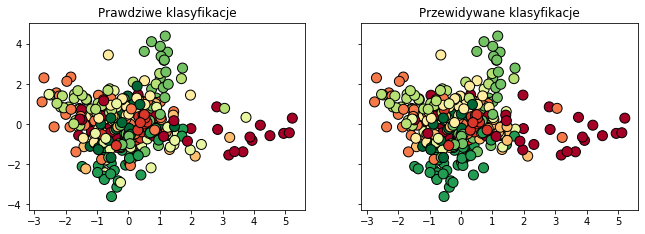

Kernel:  poly


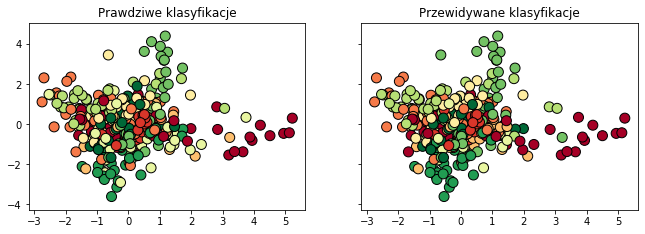

Kernel:  sigmoid


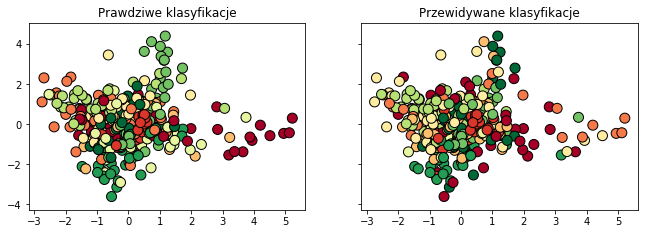

Kernel:  rbf


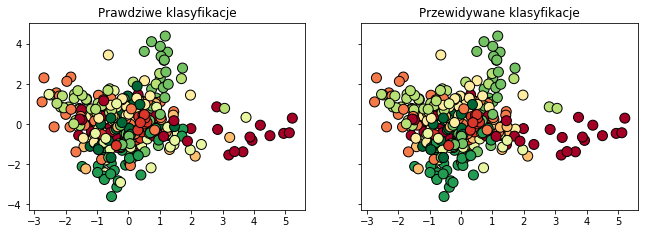

K: 1


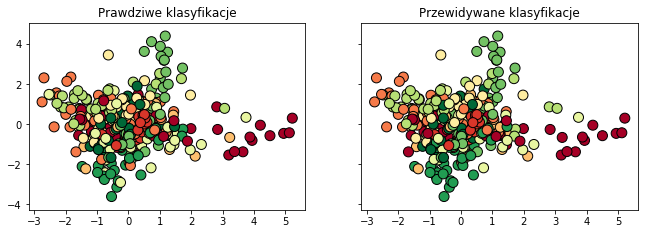

K: 2


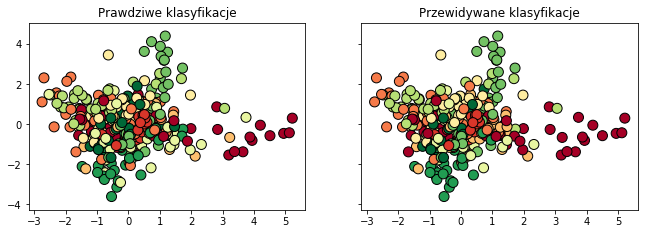

K: 3


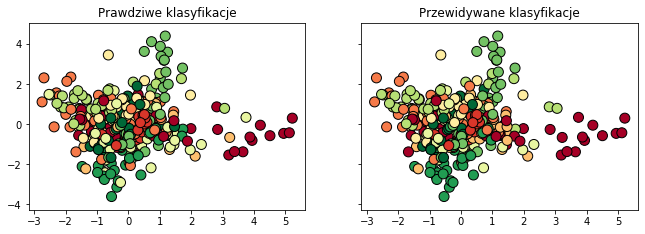

K: 4


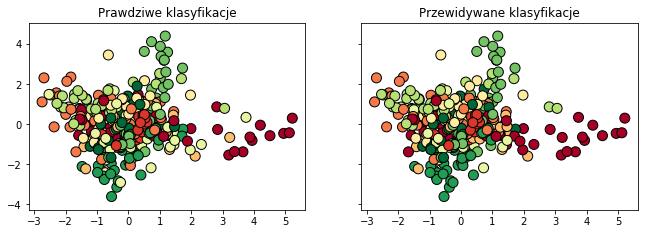

K: 5


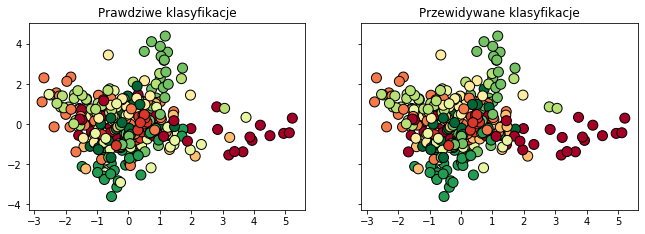

In [64]:
for i, result in enumerate(pca_classification_results):
  print("Kernel: ", result[3])
  plot_results_with_pca(task_test_pca, task_test_labels, result[1])

print("===================================================")

for i, prediction in enumerate(predictions_pca):
  print("K: {}".format(i+1))
  plot_results_with_pca(task_test_pca,task_test_labels, prediction[1])